# Paper reproduction demo: Tighter Variational Bounds are Not Necessarily Better

## Prepare the environment:

Remember to choose the GPU runtime on Colab.

In [4]:
!git clone https://github.com/madhubabuv/TightIWAE.git

Cloning into 'TightIWAE'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (280/280), done.
remote: Total 390 (delta 165), reused 310 (delta 99), pack-reused 0
Receiving objects: 100% (390/390), 92.14 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [ ]:
!pip install torch==1.4.0 torchvision==0.5.0
!pip install h5py
!pip install matplotlib
!pip install scipy==1.3.1 numpy==1.17.0

In [ ]:
# Restart runtime automatically ...
import os
os.kill(os.getpid(), 9)

In [2]:
%cd TightIWAE

/content/TightIWAE


In [ ]:
!python miwae_simplified.py --help

usage: miwae_simplified.py [-h] [--batch-size N] [--epochs N] [--no-cuda]
                           [--log-interval N] [--beta BETA] [--k K] [--M M]
                           [--piwae] [--miwae] [--ciwae] [--rpiwae]
                           [--repetition REPETITION] [--dataset_name DN]
                           [--cont] [--ciwae-beta]

VAE MNIST Example

optional arguments:
  -h, --help            show this help message and exit
  --batch-size N        input batch size for training (default: 20)
  --epochs N            number of epochs to train (default: 10)
  --no-cuda             disables CUDA training
  --log-interval N      how many batches to wait before logging training
                        status
  --beta BETA           beta for CIWAE
  --k K
  --M M
  --piwae
  --miwae
  --ciwae
  --rpiwae
  --repetition REPETITION
  --dataset_name DN     name of the dataset: mnist, omniglot
  --cont
  --ciwae-beta


## Run training:

In [ ]:
# PIWAE (M=8,k=8)
!python miwae_simplified.py --piwae --k 8 --M 8 --dataset_name omniglot

runnning on cuda
Using PIWAE

Saved to ./datasets/omniglot/chardata.mat
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Train Epoch: 1 [0/24345 (0%)]	Loss: 547.543671
Train Epoch: 1 [10000/24345 (41%)]	Loss: 162.192810
Train Epoch: 1 [20000/24345 (82%)]	Loss: 163.200439
====>Test metrics: IWAE M= 8 ,k= 8  || epoch 1
IWAE-64:  149.72327
logˆp(x) = IWAE-5000:  150.30241
−KL(Q||P):  -0.57914734
---------------
Train Epoch: 2 [0/24345 (0%)]	Loss: 161.861664
Train Epoch: 2 [10000/24345 (41%)]	Loss: 175.498116
Train Epoch: 2 [20000/24345 (82%)]	Loss: 157.212715
====>Test metrics: IWAE M= 8 ,k= 8  || epoch 2
IWAE-64:  140.36447
logˆp(x) = IWAE-5000:  141.3033
−KL(Q||P):  -0.9388275
---------------
Train Epoch: 3 [0/24345 (0%)]	Loss: 132.378754
Train Epoch: 3 [10000/24345 (41%)]	Loss: 149.207878
Train Epoch: 3 [20000/24345 (82%)

Saved logs and model files are now here:

In [ ]:
!ls -luah logs/

In [ ]:
# Or use other setups:
"""
# MIWAE (M=8,k=8)
!python miwae_simplified.py --miwae --k 8 --M 8 --dataset_name mnist

# IWAE (M=1,k=64)
!python miwae_simplified.py --miwae --k 64 --M 1 --dataset_name mnist

# CIWAE (Beta=0.5)
!python miwae_simplified.py --ciwae --beta 0.5 --dataset_name mnist

# VAE (M=1,k=1)
!python miwae_simplified.py --miwae --k 1 --M 1 --dataset_name mnist
"""

## Visualize the trained models, reconstruct images:

In [21]:
model_folder = "/content/TightIWAE/plotting_utils/"
!ls -luah $model_folder"1_reference_model/logs/"

total 17M
drwxr-xr-x 2 root root 4.0K Apr 13 16:51 .
drwxr-xr-x 3 root root 4.0K Apr 13 16:48 ..
-rw-r--r-- 1 root root  41K Apr 13 16:48 log_CIVAE_beta0.5_repeat10.h5
-rw-r--r-- 1 root root  41K Apr 13 16:48 log_MIVAE_M1_k1_repeat10.h5
-rw-r--r-- 1 root root  41K Apr 13 16:48 log_MIVAE_M1_k64_repeat10.h5
-rw-r--r-- 1 root root  41K Apr 13 16:48 log_MIVAE_M8_k8_repeat10.h5
-rw-r--r-- 1 root root  41K Apr 13 16:48 log_PIWAE_M8_k8_repeat10.h5
-rw-r--r-- 1 root root 1.7M Apr 13 16:48 model_CIVAE_beta0.5_repeat10_best.pt
-rw-r--r-- 1 root root 1.7M Apr 13 16:48 model_CIVAE_beta0.5_repeat10.pt
-rw-r--r-- 1 root root 1.7M Apr 13 16:48 model_MIVAE_M1_k1_repeat10_best.pt
-rw-r--r-- 1 root root 1.7M Apr 13 16:48 model_MIVAE_M1_k1_repeat10.pt
-rw-r--r-- 1 root root 1.7M Apr 13 16:48 model_MIVAE_M1_k64_repeat10_best.pt
-rw-r--r-- 1 root root 1.7M Apr 13 16:48 model_MIVAE_M1_k64_repeat10.pt
-rw-r--r-- 1 root root 1.7M Apr 13 16:53 model_MIVAE_M8_k8_repeat10_best.pt
-rw-r--r-- 1 root root 1.7M Apr 

### Reconstructions across dataset

Trained on MNIST, reconstructed from Omniglot:

In [22]:
# Dataset
dataset_name = 'omniglot'

# Model
model_load_path = model_folder+"1_reference_model/logs/model_MIVAE_M8_k8_repeat10_best.pt" # < model trained on MNIST
#model_load_path = model_folder+"3_other_datasets/logs/model_PIWAE_M8_k8_omniglot_best.pt" # < model trained on Omniglot

model_hidden_size = 200
model_latent_size = 50
model_num_layers = 2

batch_size = 8*8 # grid size

In [23]:
# ================================

from __future__ import print_function
import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torchvision.utils import save_image

from torch.distributions.bernoulli import Bernoulli
from torch.distributions.normal import Normal
import numpy as np
import pdb

import pytorch_ssim

# =================================

import argparse
import torch
import torch.utils.data
import numpy as np
from utils import *
from model import VAE

cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("runnning on", device)

if dataset_name == 'mnist':
    from datasets import load_binarised_MNIST

    path = "./datasets/MNIST"
    train_loader, test_loader, input_size = load_binarised_MNIST(path, cuda, batch_size)
elif dataset_name == 'omniglot':
    from datasets import load_OMNIGLOT

    path = "./datasets/omniglot"
    train_loader, test_loader, input_size = load_OMNIGLOT(path, cuda, batch_size)

model = VAE(input_size=input_size, device=device, hidden_size=model_hidden_size, latent_size=model_latent_size, num_layers=model_num_layers).to(device)

def visualize(viz_name):
    model.eval()
    image_shape = (28, 28)
    ssim_loss = pytorch_ssim.SSIM()

    with torch.no_grad():
        ssim_losses = []
        it = 0

        for data, _ in test_loader:
            reconstruction, elbo, loss = model(data, M=1, k=1)
            samples_n = len(data) # 20

            out_grid = reconstruction.view(samples_n, 1, 28, 28)
            in_grid = data.view(samples_n, 1, 28, 28)

            #print("in_grid.shape",in_grid.shape)
            #print("out_grid.shape",out_grid.shape)

            if it == 0:
                save_image(in_grid, 'inputs_'+viz_name+'.png')
                save_image(out_grid, 'reconstructions_'+viz_name+'.png')
            it += 1
            for item_idx in range(samples_n):
                in_data = in_grid[item_idx,0].reshape((1,1,)+image_shape)
                out_data = out_grid[item_idx,0].reshape((1,1,)+image_shape)

                in_data, out_data = in_data.cuda(), out_data.cuda()

                #print("in_data", in_data.shape)
                #print("out_data", out_data.shape)

                ssim = ssim_loss(in_data, out_data)
                ssim_losses.append(ssim.cpu().numpy())


        ssim_losses = np.asarray(ssim_losses)
        return ssim_losses

if __name__ == "__main__":
    # model = torch.load("logs/model_" + files_name + "_best.pt")
    model = torch.load(model_load_path)
    model.to(device)
    model.eval()

    viz_name = dataset_name + "_" + model_load_path.split("/")[-1]
    print(model)
    ssim_losses = visualize(viz_name)

runnning on cuda
VAE(
  (encoder): Encoder(
    (fc11): Linear(in_features=784, out_features=200, bias=True)
    (fc12): Linear(in_features=200, out_features=200, bias=True)
    (fc21): Linear(in_features=200, out_features=50, bias=True)
    (fc22): Linear(in_features=200, out_features=50, bias=True)
  )
  (decoder): Decoder(
    (fc31): Linear(in_features=50, out_features=200, bias=True)
    (fc32): Linear(in_features=200, out_features=200, bias=True)
    (fc4): Linear(in_features=200, out_features=784, bias=True)
  )
)


/usr/local/lib/python3.7/dist-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'model.VAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [8]:
# SSIM loss report:
print("(over whole test set) average ssim loss:", np.mean(ssim_losses), "+-", np.std(ssim_losses))

(over whole test set) average ssim loss: 0.59389436 +- 0.11527665


In [24]:
!ls *.png

inputs_omniglot_model_MIVAE_M8_k8_repeat10_best.pt.png
inputs_omniglot_model_PIWAE_M8_k8_omniglot_best.pt.png
reconstructions_omniglot_model_MIVAE_M8_k8_repeat10_best.pt.png
reconstructions_omniglot_model_PIWAE_M8_k8_omniglot_best.pt.png


In [17]:
#from IPython.display import Image
#Image("inputs_omniglot_model_MIVAE_M8_k8_repeat10_best.pt.png", width=512)
#Image("reconstructions_omniglot_model_MIVAE_M8_k8_repeat10_best.pt.png", width=512)

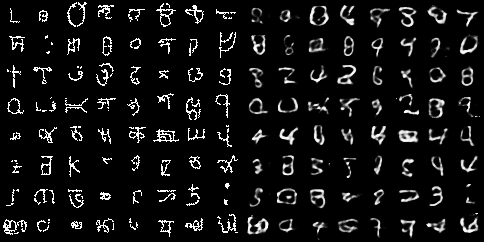

Left: input from omniglot  Right: reconstruction by model loaded from: 1_reference_model/logs/model_MIVAE_M8_k8_repeat10_best.pt


In [16]:
import cv2
from google.colab.patches import cv2_imshow
from pylab import plt

input_img = cv2.imread("inputs_omniglot_model_MIVAE_M8_k8_repeat10_best.pt.png")
reconstructed_img = cv2.imread("reconstructions_omniglot_model_MIVAE_M8_k8_repeat10_best.pt.png")

both = np.concatenate(([input_img,reconstructed_img]), axis = 1)

cv2_imshow(both)
print("Left: input from",dataset_name," Right: reconstruction by model loaded from:", model_load_path.replace("/content/TightIWAE/plotting_utils/",""))

In comparison this is a reconstruction from a model which was directly trained on Omniglot.

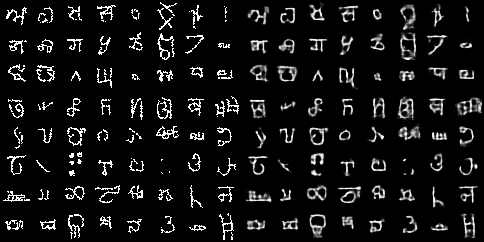

Left: input from omniglot  Right: reconstruction by model loaded from: 3_other_datasets/logs/model_PIWAE_M8_k8_omniglot_best.pt


In [25]:
import cv2
from google.colab.patches import cv2_imshow
from pylab import plt

input_img = cv2.imread("inputs_omniglot_model_PIWAE_M8_k8_omniglot_best.pt.png")
reconstructed_img = cv2.imread("reconstructions_omniglot_model_PIWAE_M8_k8_omniglot_best.pt.png")

both = np.concatenate(([input_img,reconstructed_img]), axis = 1)

cv2_imshow(both)
print("Left: input from",dataset_name," Right: reconstruction by model loaded from:", model_load_path.replace("/content/TightIWAE/plotting_utils/",""))